In [1]:
import numpy as np
import pandas as pd
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [6]:
model = nn.Sequential(
          nn.Linear(1, 100),
          nn.Sigmoid(),
          nn.Linear(100, 1)
        )
model.to('cuda')

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [2]:
data = np.loadtxt("./lienard_intermittency.dat")

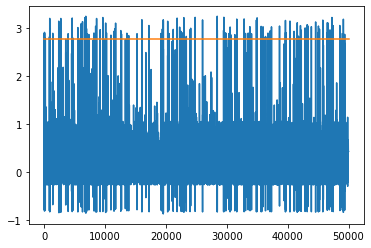

In [5]:
plt.plot(data[:, 1])
plt.plot([0, 50000],[mean + 8*std]*2)

In [3]:
train = data[:, 1][:45000]
test =  data[:, 1][45000:]

mean = train.mean()
std = train.std()
#sigmastest = np.abs(test - mean)
train_norm = (train - mean)/std
test_norm = (test - mean)/std

In [6]:
train = torch.FloatTensor(train).view(-1 ,1)
test = torch.FloatTensor(test).view(-1 ,1)

In [7]:
train.size()

torch.Size([45000, 1])

In [8]:
X = train[:-1]
Y = train[1:]
X.size() == Y.size()

True

In [9]:
X_t = test[:-1]
Y_t = test[1:]
X_t.size() == Y_t.size()

True

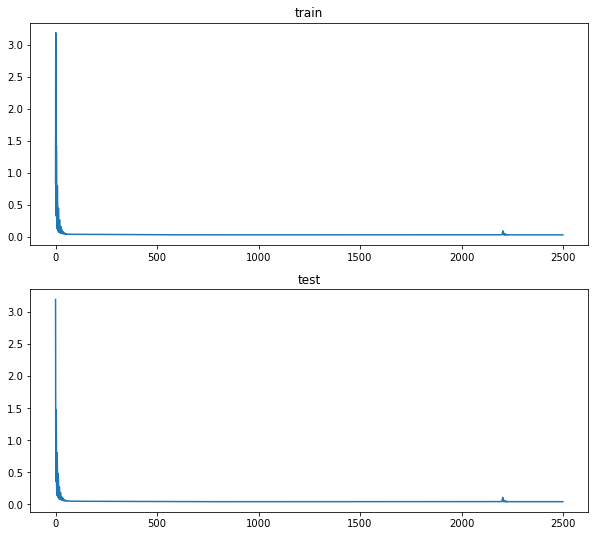

0.028680894523859024


In [9]:
epochs = 2500
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
losses = []
val_losses = []
model.train()
for i in range(epochs):
    #train
    epoch_loss = []
    val_epoch_loss = []
    model.train()
    optimizer.zero_grad()
    
    y_pred = model(X.to('cuda'))

    single_loss = nn.MSELoss()(y_pred, Y.to('cuda'))
    single_loss.backward()
    optimizer.step()
    epoch_loss.append(single_loss.item())
    
    #valid
    model.eval()
    y_pred = model(X_t.to('cuda'))

    single_loss = nn.MSELoss()(y_pred, Y_t.to('cuda'))
    val_epoch_loss.append(single_loss.item())    
    
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    val_losses.append(np.mean(val_epoch_loss))
    
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses)
    ax_2.set_title('test')
    ax_2.plot(val_losses)
    plt.show()
    print(losses[-1])

In [23]:
losses[:10]

[0.11726879328489304,
 5.69050931930542,
 0.45994654297828674,
 1.2045376300811768,
 3.0648722648620605,
 2.3123724460601807,
 0.7342131733894348,
 0.08018025755882263,
 0.5785536170005798,
 1.290408968925476]

In [24]:
val_losses[:10]

[5.679252624511719,
 0.4748975336551666,
 1.2459444999694824,
 3.11736798286438,
 2.3612558841705322,
 0.7716906666755676,
 0.1034802719950676,
 0.5891534090042114,
 1.2932326793670654,
 1.3825550079345703]

In [83]:
model.eval()
model.to('cpu')
k = 15
#last_k_step = test[0]
prediction = []
for i in range(k, len(test)):
    pred = test[i-k]
    #if pred > 1:
       # print(pred)
    for j in range(k):
        pred = model(pred).detach()
    prediction.append(pred.item())

In [84]:
len(prediction)

4985

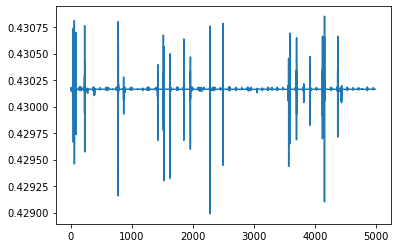

In [85]:
plt.plot(prediction)

In [78]:
model.eval()
model.to('cpu')
rmse = []
for k in range(1, 21):
    #k = 5
    prediction = []
    for i in range(k, len(test)):
        pred = test[i-k]
        #if pred > 1:
           # print(pred)
        for j in range(k):
            pred = model(pred).detach()
        prediction.append(pred[0])
    r = (((np.array(prediction) - test[k:].numpy().flatten())**2).mean())**0.5
    rmse.append(r)

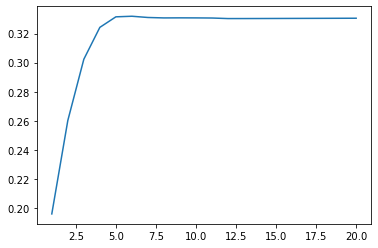

In [86]:
plt.plot(list(range(1, 21)),rmse)

In [40]:
test[1:].numpy()

array([[0.4654628 ],
       [0.47565612],
       [0.49247319],
       ...,
       [0.42861876],
       [0.42880046],
       [0.42897847]], dtype=float32)

In [41]:
np.array(prediction) - test[1:].numpy().flatten()

array([-0.04907754, -0.06252599, -0.08423313, ...,  0.00238001,
        0.00211224,  0.0018461 ])

In [77]:
(((np.array(prediction) - test[2:].numpy().flatten())**2).mean())**0.5

0.26014086631289746

In [35]:
len(prediction)

4998

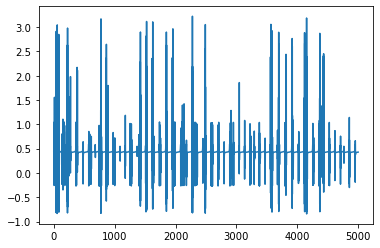

In [38]:
plt.plot(test)

In [33]:
np.max(prediction)

0.43020153

In [34]:
len(prediction)

4979

In [17]:
test.max()

tensor(3.2225)

In [15]:
np.max(test[0])

TypeError: max() received an invalid combination of arguments - got (axis=NoneType, out=NoneType, ), but expected one of:
 * ()
 * (name dim, bool keepdim)
      didn't match because some of the keywords were incorrect: axis, out
 * (Tensor other)
 * (int dim, bool keepdim)
      didn't match because some of the keywords were incorrect: axis, out


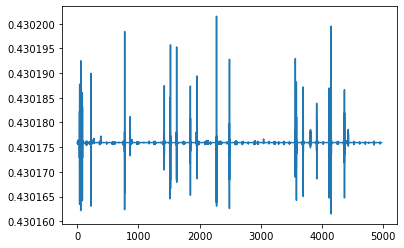

In [11]:
plt.plot(prediction)

In [10]:
model.to('cpu')
y_test = model(test[:-1])

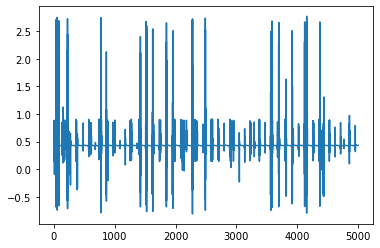

In [11]:
plt.plot(y_test.detach().numpy())

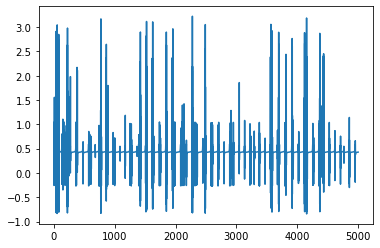

In [12]:
plt.plot(test[1:])

In [17]:
np.save('FFNN_lienar', y_test.detach().numpy())

In [19]:
y_test.detach().numpy()

array([[0.4167099 ],
       [0.41348833],
       [0.40864423],
       ...,
       [0.4311442 ],
       [0.43105936],
       [0.43097243]], dtype=float32)

In [13]:
(((y_test.detach().numpy() - test[1:].numpy())**2).mean())**0.5

0.19593932655918936

# Новый loss

In [1]:
def gevl_loss(y_pred, y_true):
    u = y_pred - y_true  
    return (1-torch.exp(-u**2))*u**2

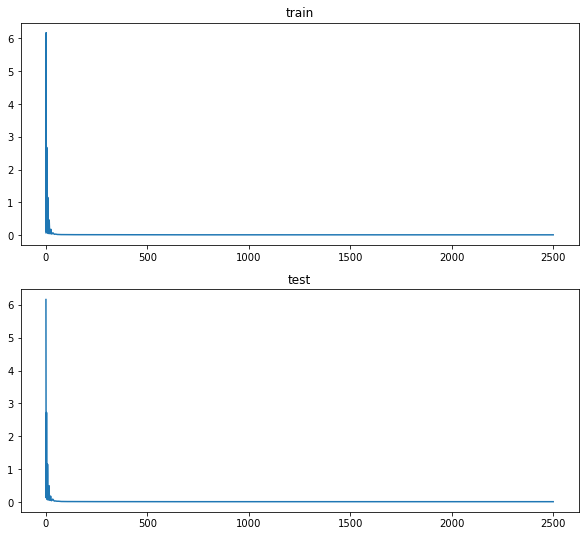

0.010877403430640697


In [16]:
epochs = 2500
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
losses = []
val_losses = []
model.train()
for i in range(epochs):
    #train
    epoch_loss = []
    val_epoch_loss = []
    model.train()
    optimizer.zero_grad()
    
    y_pred = model(X.to('cuda'))

    single_loss = gevl_loss(y_pred, Y.to('cuda')).mean()
    single_loss.backward()
    optimizer.step()
    epoch_loss.append(single_loss.item())
    
    #valid
    model.eval()
    y_pred = model(X_t.to('cuda'))

    single_loss = gevl_loss(y_pred, Y_t.to('cuda')).mean()
    val_epoch_loss.append(single_loss.item())    
    
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    val_losses.append(np.mean(val_epoch_loss))
    
    fig = plt.figure(figsize=(10, 9))
    
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses)
    ax_2.set_title('test')
    ax_2.plot(val_losses)
    plt.show()
    print(losses[-1])

In [17]:
model.eval()
model.to('cpu')
k = 1
#last_k_step = test[0]
prediction = []
for i in range(k, len(test)):
    pred = test[i-k]
    #if pred > 1:
       # print(pred)
    for j in range(k):
        pred = model(pred).detach()
    prediction.append(pred.item())

In [20]:
np.array(prediction) - test[1:].numpy().flatten()

array([-0.08343419, -0.09831899, -0.12215656, ..., -0.02534992,
       -0.02565753, -0.02596447])

In [22]:
(((np.array(prediction) - test[1:].numpy().flatten())**2).mean())**0.5

0.19889028245231635

Теперь что-то новое

In [14]:
model = nn.Sequential(
          nn.Linear(1, 200),
          nn.ReLU(),
          nn.Linear(200, 100),
          nn.ReLU(),
          nn.Linear(100, 1)
        )
model.to('cuda')

Sequential(
  (0): Linear(in_features=1, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
)

In [15]:
epochs = 2500
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
losses = []
model.train()
for i in range(epochs):
    epoch_loss = []
    optimizer.zero_grad()
    
    y_pred = model(X.to('cuda'))

    single_loss = nn.MSELoss()(y_pred, Y.to('cuda'))
    single_loss.backward()
    optimizer.step()
    epoch_loss.append(single_loss.item())

        
    clear_output(True)
    losses.append(np.mean(epoch_loss))
    plt.title("loss on train")
    plt.plot(losses)
    plt.show()
    print(losses[-1])

KeyboardInterrupt: 

In [16]:
model.to('cpu')
y_test = model(test[:-1])

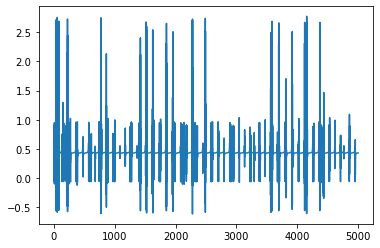

In [17]:
plt.plot(y_test.detach().numpy())

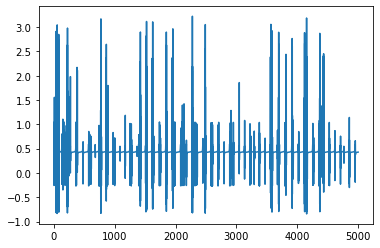

In [18]:
plt.plot(test[1:])

In [19]:
(((y_test.detach().numpy() - test[1:].numpy())**2).mean())**0.5

0.16473104298509098